In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, jaccard_similarity_score

# importando dados
dataset = pd.read_csv("data/dados.csv")
y_true = pd.read_csv('data/train.csv',sep=';')

In [2]:
enc = LabelEncoder()
hot = OneHotEncoder(sparse=False)
#display(dataset.head())
dataset.poutcome = enc.fit_transform(dataset['poutcome'])
dataset.day_of_week = enc.fit_transform(dataset['day_of_week'])
dataset.month = enc.fit_transform(dataset['month'])
dataset.contact = enc.fit_transform(dataset['contact'])
dataset.housing = enc.fit_transform(dataset['housing'])
dataset.loan = enc.fit_transform(dataset['loan'])
dataset.marital = enc.fit_transform(dataset['marital'])
dataset.default = enc.fit_transform(dataset['default'])
dataset.education = enc.fit_transform(dataset['education'])
dataset.job = enc.fit_transform(dataset['job'])
del dataset['emp.var.rate']
del dataset['cons.price.idx']
del dataset['cons.conf.idx']
del dataset['euribor3m']
del dataset['nr.employed']
del dataset['duration']
#del dataset['age']
#del dataset['job']
#del dataset['education']
#del dataset['month']
#del dataset['day_of_week']
#del dataset['contact']

#del_columns = ['duration','default']
#dataset = dataset.drop(del_columns, axis=1)
#print(dataset.columns)

onehot_encoder = OneHotEncoder(sparse=False)

display(dataset.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome
0,30,1,1,2,0,2,0,0,6,0,2,999,0,1
1,39,7,2,3,0,0,0,1,6,0,4,999,0,1
2,25,7,1,3,0,2,0,1,4,4,1,999,0,1
3,38,7,1,2,0,1,1,1,4,0,3,999,0,1
4,47,0,1,5,0,2,0,0,7,1,1,999,0,1


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Tamanho ->  2999


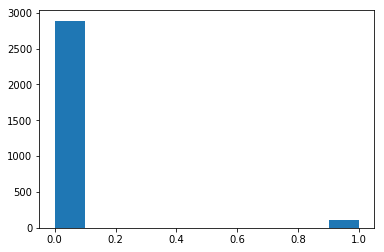

In [3]:
# agrupamento  de dados pelo KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
model = kmeans.fit(dataset)
display(model.labels_)
plt.hist(model.labels_)
print('Tamanho -> ',len(model.labels_))

In [4]:
# gerar o csv
#previsao = pd.DataFrame()
#previsao["Predicted"] = model.labels_
#previsao.to_csv('prediction.csv',index=True,index_label="Id")

In [5]:
#new = pd.read_csv('prediction.csv')
#display(new)
#display(new.shape)

In [6]:
#print(dataset.columns,'\n\n')
y_true.y = enc.fit_transform(y_true['y'])
print('Score -> ',jaccard_similarity_score(y_true.y,model.labels_))
#print('Score -> ',adjusted_rand_score(y_true.y,model.labels_))

Score ->  0.8999666555518506


In [7]:
# gerar o csv
#previsao = pd.DataFrame()
#previsao["Predicted"] = model.labels_
#previsao.to_csv('prediction.csv',index=True,index_label="Id")

In [8]:
#new = pd.read_csv('prediction.csv')
#display(new)
#display(new.shape)

In [9]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(dataset, 2)
kmeans_ = pd.DataFrame(clust_labels)
dataset.insert((dataset.shape[1]),'kmeans',kmeans)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'kmeans'],
      dtype='object')


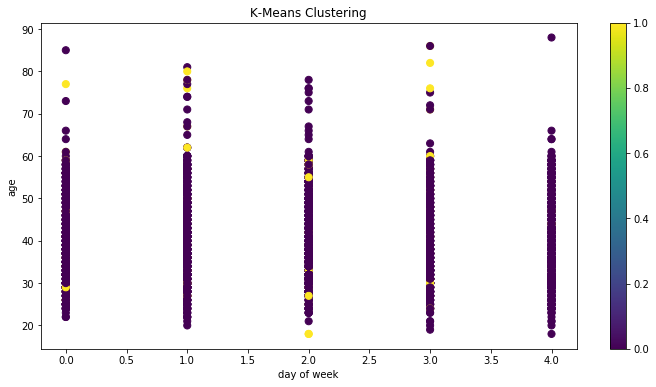

In [19]:
#Plot the clusters obtained using k means
print(dataset.columns)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(dataset['day_of_week'],dataset['age'],c=kmeans_[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('day of week')
ax.set_ylabel('age')
plt.colorbar(scatter)